In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

74.25267845498524 -54.18721841006911
3.498325479962702 75.64794918639802
-33.1396617022139 -167.32541931016252
43.668365128477944 36.720707582123595
52.172079988521915 -126.38275473506641
-61.02525606090143 174.42493474500395
72.71539206208092 127.2968338074287
-64.69330222325607 -37.77665714763498
-50.00695332523857 -21.64480628020496
-72.14027594884128 166.0598694788298
-18.40174433442249 -90.66515272499805
27.624603948940248 -2.346138200023404
89.32139664354253 149.77541233185536
-44.50293349412084 10.208981685445394
-65.6840857331455 23.671440716610732
54.7601353546095 -19.26678700036834
42.2082777403825 171.20966342734272
53.83269061224712 -88.19050332339505
60.43347141135379 -8.107700421109456
57.24441899519712 10.799364018100107
1.227049496994809 -61.730635033035966
61.6312120780502 103.53460985907202
22.293778628096675 47.067196571259615
-28.919568123786 -21.686727235650892
-11.997888332785934 137.51487922338475
62.33460057516305 -151.48579661937706
-27.986312156174137 42.70465

69.53469981830284 100.9935863407693
-81.89391743246634 123.62232729510248
-89.14697329562787 40.886962441582085
-12.203733136789921 63.88591253160433
-7.236276593900939 -99.37076207257911
-38.119471171074444 94.70564455048122
-76.1833410040559 54.89903299987708
82.03405430297096 72.58973230599744
81.12902717781446 -72.28368498038593
41.289232544708966 -118.71857625664768
9.382463781313788 -23.981352318617382
-3.2494857469300626 164.91302013662016
27.34863627960361 155.76378761721008
-4.351991488539255 129.8287472783315
1.5700293146594078 68.86611508894089
8.651155539946203 54.41711761226372
-1.431422690658252 -150.75672586840466
-64.49164987700584 -107.42148510305147
83.38681160324882 -60.917521271566955
-2.3151809542122095 -113.6210218616359
76.34997558712979 -71.81331850479641
-57.77475070214364 -125.65242896358492
13.83877909729641 -103.71672804795952
-26.350557969917134 133.6551066499532
5.8790994162445855 179.80137236364936
85.84715652122762 -50.96170368293514
52.850816665703746 3

In [5]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        # Loop through all the cities in the list.
        for i, city in enumerate(cities):

            # Group cities in sets of 50 for logging purposes.
            if (i % 50 == 0 and i >= 50):
                set_count += 1
                record_count = 1
                time.sleep(60)

            # Create endpoint URL with each city.
            city_url = url + "&q=" + city.replace(" ","+")

            # Log the URL, record, and set numbers and the city.
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            # Add 1 to the record count.
            record_count += 1
            
            # Run an API request for each of the cities.
            try:
                # Parse the JSON and retrieve data.
                city_weather = requests.get(city_url).json()
                # Parse out the needed data.
                city_lat = city_weather["coord"]["lat"]
                city_lng = city_weather["coord"]["lon"]
                city_max_temp = city_weather["main"]["temp_max"]
                city_humidity = city_weather["main"]["humidity"]
                city_clouds = city_weather["clouds"]["all"]
                city_wind = city_weather["wind"]["speed"]
                city_country = city_weather["sys"]["country"]
                # Convert the date to ISO standard.
                city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
                # Append the city information into city_data list.
                city_data.append({"City": city.title(),
                                  "Lat": city_lat,
                                  "Lng": city_lng,
                                  "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date})

        # If an error is experienced, skip the city.
            except:
                print("City not found. Skipping...")
                pass

        # Indicate that Data Loading is complete.
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + cities[i]
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 2 | upernavik
Processing Record 2 of Set 2 | felidhoo
City not found. Skipping...
Processing Record 3 of Set 2 | avarua
Processing Record 4 of Set 2 | abrau-dyurso
Processing Record 5 of Set 2 | port hardy
Processing Record 6 of Set 2 | kaitangata
Processing Record 7 of Set 2 | tiksi
Processing Record 8 of Set 2 | ushuaia
Processing Record 9 of Set 2 | arraial do cabo
Processing Record 10 of Set 2 | bluff
Processing Record 11 of Set 2 | hualmay
Processing Record 12 of Set 2 | adrar
Processing Record 13 of Set 2 | chokurdakh
Processing Record 14 of Set 2 | cape town
Processing Record 15 of Set 2 | bredasdorp
Processing Record 16 of Set 2 | vestmannaeyjar
Processing Record 17 of Set 2 | nikolskoye
Processing Record 18 of Set 2 | geraldton
Processing Record 19 of Set 2 | toftir
City not found. Skipping...
Processing Record 20 of Set 2 | saeby
Processing Record 21 of Set 2 | boa vista
Processing Record 2

Processing Record 35 of Set 5 | marcona
City not found. Skipping...
Processing Record 36 of Set 5 | saldanha
Processing Record 37 of Set 5 | husavik
Processing Record 38 of Set 5 | todos santos
Processing Record 39 of Set 5 | barsovo
Processing Record 40 of Set 5 | port elizabeth
Processing Record 41 of Set 5 | lagoa
Processing Record 42 of Set 5 | srednekolymsk
Processing Record 43 of Set 5 | komsomolskiy
Processing Record 44 of Set 5 | mathbaria
Processing Record 45 of Set 5 | nizwa
Processing Record 46 of Set 5 | paamiut
Processing Record 47 of Set 5 | hammond
Processing Record 48 of Set 5 | bambous virieux
Processing Record 49 of Set 5 | agha jari
City not found. Skipping...
Processing Record 50 of Set 5 | grand gaube
Processing Record 1 of Set 6 | umm kaddadah
Processing Record 2 of Set 6 | berlevag
Processing Record 3 of Set 6 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 6 | shenkursk
Processing Record 5 of Set 6 | ketchikan
Processing Record 6 of Set 6 | 

City not found. Skipping...
Processing Record 25 of Set 9 | haines junction
Processing Record 26 of Set 9 | pangkalanbuun
Processing Record 27 of Set 9 | kibala
Processing Record 28 of Set 9 | san jose
Processing Record 29 of Set 9 | xilagani
Processing Record 30 of Set 9 | yar-sale
Processing Record 31 of Set 9 | karaton
Processing Record 32 of Set 9 | hay river
Processing Record 33 of Set 9 | tsihombe
City not found. Skipping...
Processing Record 34 of Set 9 | kerrville
Processing Record 35 of Set 9 | zlotow
Processing Record 36 of Set 9 | bubaque
Processing Record 37 of Set 9 | inirida
Processing Record 38 of Set 9 | palu
Processing Record 39 of Set 9 | jiazi
Processing Record 40 of Set 9 | nakasongola
Processing Record 41 of Set 9 | gizo
Processing Record 42 of Set 9 | padang
Processing Record 43 of Set 9 | bambari
Processing Record 44 of Set 9 | poum
Processing Record 45 of Set 9 | shingu
Processing Record 46 of Set 9 | kavieng
Processing Record 47 of Set 9 | sao luiz gonzaga
Proc

Processing Record 11 of Set 13 | panorama
Processing Record 12 of Set 13 | la ronge
Processing Record 13 of Set 13 | port hedland
Processing Record 14 of Set 13 | gold coast
Processing Record 15 of Set 13 | kazalinsk
City not found. Skipping...
Processing Record 16 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 13 | toktogul
Processing Record 18 of Set 13 | vanimo
Processing Record 19 of Set 13 | nalut
Processing Record 20 of Set 13 | caborca
Processing Record 21 of Set 13 | khandagayty
Processing Record 22 of Set 13 | maragogi
Processing Record 23 of Set 13 | terenga
City not found. Skipping...
Processing Record 24 of Set 13 | santa fe
Processing Record 25 of Set 13 | redmond
Processing Record 26 of Set 13 | abu kamal
Processing Record 27 of Set 13 | sorland
Processing Record 28 of Set 13 | alta floresta
Processing Record 29 of Set 13 | agua verde
Processing Record 30 of Set 13 | nizhniy tagil-39
City not found. Skipping...
Processing Record 31 of Set

Processing Record 27 of Set 17 | zhezkazgan
Processing Record 28 of Set 17 | thompson
Processing Record 29 of Set 17 | north platte
Processing Record 30 of Set 17 | ribeira grande
Processing Record 31 of Set 17 | necochea
Processing Record 32 of Set 17 | saint-philippe
Processing Record 33 of Set 17 | faanui
Processing Record 34 of Set 17 | torbay
Processing Record 35 of Set 17 | oranjemund
Processing Record 36 of Set 17 | awjilah
Processing Record 37 of Set 17 | albolote
Processing Record 38 of Set 17 | aku
Processing Record 39 of Set 17 | macas
Processing Record 40 of Set 17 | bongor
Processing Record 41 of Set 17 | dikson
Processing Record 42 of Set 17 | samarai
Processing Record 43 of Set 17 | ngukurr
City not found. Skipping...
Processing Record 44 of Set 17 | codrington
Processing Record 45 of Set 17 | angoche
Processing Record 46 of Set 17 | mehamn
Processing Record 47 of Set 17 | port shepstone
Processing Record 48 of Set 17 | yuty
Processing Record 49 of Set 17 | parintins
Pro

Processing Record 12 of Set 21 | porto santo
Processing Record 13 of Set 21 | tripoli
Processing Record 14 of Set 21 | mahajanga
Processing Record 15 of Set 21 | meadow lake
Processing Record 16 of Set 21 | laguna
Processing Record 17 of Set 21 | manono
Processing Record 18 of Set 21 | san patricio
Processing Record 19 of Set 21 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 21 | longyearbyen
Processing Record 21 of Set 21 | belaya gora
Processing Record 22 of Set 21 | chicago
Processing Record 23 of Set 21 | katobu
Processing Record 24 of Set 21 | podporozhye
Processing Record 25 of Set 21 | najran
Processing Record 26 of Set 21 | stokmarknes
Processing Record 27 of Set 21 | rowlett
Processing Record 28 of Set 21 | ambilobe
Processing Record 29 of Set 21 | zhigansk
Processing Record 30 of Set 21 | hundorp
Processing Record 31 of Set 21 | aksarka
Processing Record 32 of Set 21 | luderitz
Processing Record 33 of Set 21 | susanville
Processing Record 34 of Set 21 |

Processing Record 49 of Set 24 | sawakin
Processing Record 50 of Set 24 | hendersonville
Processing Record 1 of Set 25 | cazaje
City not found. Skipping...
Processing Record 2 of Set 25 | visp
Processing Record 3 of Set 25 | sibenik
Processing Record 4 of Set 25 | urulga
City not found. Skipping...
Processing Record 5 of Set 25 | aranos
Processing Record 6 of Set 25 | kodinsk
Processing Record 7 of Set 25 | lieksa
Processing Record 8 of Set 25 | dromolaxia
Processing Record 9 of Set 25 | tilichiki
Processing Record 10 of Set 25 | sabha
Processing Record 11 of Set 25 | windhoek
Processing Record 12 of Set 25 | jubbal
Processing Record 13 of Set 25 | jinchengjiang
City not found. Skipping...
Processing Record 14 of Set 25 | namatanai
Processing Record 15 of Set 25 | preobrazheniye
Processing Record 16 of Set 25 | kargasok
Processing Record 17 of Set 25 | marsa matruh
Processing Record 18 of Set 25 | hamilton
Processing Record 19 of Set 25 | mendahara
City not found. Skipping...
Processin

Processing Record 20 of Set 29 | belyy yar
Processing Record 21 of Set 29 | mullaitivu
City not found. Skipping...
Processing Record 22 of Set 29 | rocha
Processing Record 23 of Set 29 | phuket
Processing Record 24 of Set 29 | aklavik
Processing Record 25 of Set 29 | mount isa
Processing Record 26 of Set 29 | cruzilia
Processing Record 27 of Set 29 | pevek
Processing Record 28 of Set 29 | taolanaro
City not found. Skipping...
Processing Record 29 of Set 29 | puerto ayora
Processing Record 30 of Set 29 | ozu
Processing Record 31 of Set 29 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 29 | leningradskiy
Processing Record 33 of Set 29 | sentyabrskiy
City not found. Skipping...
Processing Record 34 of Set 29 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 29 | victoria
Processing Record 36 of Set 29 | illoqqortoormiut
City not found. Skipping...
Processing Record 37 of Set 29 | chuy
Processing Record 38 of Set 29 | acapulco
Processing Re

Processing Record 49 of Set 32 | dwarka
Processing Record 50 of Set 32 | astana
Processing Record 1 of Set 33 | santa luzia
Processing Record 2 of Set 33 | carnarvon
Processing Record 3 of Set 33 | beyneu
Processing Record 4 of Set 33 | malakal
Processing Record 5 of Set 33 | banda aceh
Processing Record 6 of Set 33 | jalu
Processing Record 7 of Set 33 | lethem
Processing Record 8 of Set 33 | matagami
Processing Record 9 of Set 33 | innisfail
Processing Record 10 of Set 33 | oktyabrskiy
Processing Record 11 of Set 33 | oshawa
Processing Record 12 of Set 33 | kudahuvadhoo
Processing Record 13 of Set 33 | hatillo
Processing Record 14 of Set 33 | ayagoz
Processing Record 15 of Set 33 | nelson
Processing Record 16 of Set 33 | praia da vitoria
Processing Record 17 of Set 33 | gobabis
Processing Record 18 of Set 33 | karaul
City not found. Skipping...
Processing Record 19 of Set 33 | yulara
Processing Record 20 of Set 33 | kiruna
Processing Record 21 of Set 33 | pacific grove
Processing Reco

Processing Record 36 of Set 36 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 36 | tandalti
Processing Record 38 of Set 36 | nanortalik
Processing Record 39 of Set 36 | sambava
Processing Record 40 of Set 36 | empalme
Processing Record 41 of Set 36 | esperance
Processing Record 42 of Set 36 | puerto escondido
Processing Record 43 of Set 36 | burica
City not found. Skipping...
Processing Record 44 of Set 36 | carnot
Processing Record 45 of Set 36 | gat
Processing Record 46 of Set 36 | kondinskoye
Processing Record 47 of Set 36 | tual
Processing Record 48 of Set 36 | kununurra
Processing Record 49 of Set 36 | isangel
Processing Record 50 of Set 36 | bonnyville
Processing Record 1 of Set 37 | sibu
Processing Record 2 of Set 37 | adet
Processing Record 3 of Set 37 | sarana
Processing Record 4 of Set 37 | kuche
City not found. Skipping...
Processing Record 5 of Set 37 | itapaci
Processing Record 6 of Set 37 | chernyanka
Processing Record 7 of Set 37 | am timan
Processing

Processing Record 6 of Set 41 | kaitangata
Processing Record 7 of Set 41 | tiksi
Processing Record 8 of Set 41 | ushuaia
Processing Record 9 of Set 41 | arraial do cabo
Processing Record 10 of Set 41 | bluff
Processing Record 11 of Set 41 | hualmay
Processing Record 12 of Set 41 | adrar
Processing Record 13 of Set 41 | chokurdakh
Processing Record 14 of Set 41 | cape town
Processing Record 15 of Set 41 | bredasdorp
Processing Record 16 of Set 41 | vestmannaeyjar
Processing Record 17 of Set 41 | nikolskoye
Processing Record 18 of Set 41 | geraldton
Processing Record 19 of Set 41 | toftir
City not found. Skipping...
Processing Record 20 of Set 41 | saeby
Processing Record 21 of Set 41 | boa vista
Processing Record 22 of Set 41 | vanavara
Processing Record 23 of Set 41 | riyadh
Processing Record 24 of Set 41 | vila velha
Processing Record 25 of Set 41 | nhulunbuy
Processing Record 26 of Set 41 | kenai
Processing Record 27 of Set 41 | beloha
Processing Record 28 of Set 41 | umzimvubu
City 

Processing Record 37 of Set 44 | husavik
Processing Record 38 of Set 44 | todos santos
Processing Record 39 of Set 44 | barsovo
Processing Record 40 of Set 44 | port elizabeth
Processing Record 41 of Set 44 | lagoa
Processing Record 42 of Set 44 | srednekolymsk
Processing Record 43 of Set 44 | komsomolskiy
Processing Record 44 of Set 44 | mathbaria
Processing Record 45 of Set 44 | nizwa
Processing Record 46 of Set 44 | paamiut
Processing Record 47 of Set 44 | hammond
Processing Record 48 of Set 44 | bambous virieux
Processing Record 49 of Set 44 | agha jari
City not found. Skipping...
Processing Record 50 of Set 44 | grand gaube
Processing Record 1 of Set 45 | umm kaddadah
Processing Record 2 of Set 45 | berlevag
Processing Record 3 of Set 45 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 45 | shenkursk
Processing Record 5 of Set 45 | ketchikan
Processing Record 6 of Set 45 | tasiilaq
Processing Record 7 of Set 45 | luang prabang
Processing Record 8 of Set 45 | bu

Processing Record 22 of Set 48 | dryden
Processing Record 23 of Set 48 | sorrento
Processing Record 24 of Set 48 | taga dzong
City not found. Skipping...
Processing Record 25 of Set 48 | haines junction
Processing Record 26 of Set 48 | pangkalanbuun
Processing Record 27 of Set 48 | kibala
Processing Record 28 of Set 48 | san jose
Processing Record 29 of Set 48 | xilagani
Processing Record 30 of Set 48 | yar-sale
Processing Record 31 of Set 48 | karaton
Processing Record 32 of Set 48 | hay river
Processing Record 33 of Set 48 | tsihombe
City not found. Skipping...
Processing Record 34 of Set 48 | kerrville
Processing Record 35 of Set 48 | zlotow
Processing Record 36 of Set 48 | bubaque
Processing Record 37 of Set 48 | inirida
Processing Record 38 of Set 48 | palu
Processing Record 39 of Set 48 | jiazi
Processing Record 40 of Set 48 | nakasongola
Processing Record 41 of Set 48 | gizo
Processing Record 42 of Set 48 | padang
Processing Record 43 of Set 48 | bambari
Processing Record 44 of 

Processing Record 8 of Set 52 | louisbourg
City not found. Skipping...
Processing Record 9 of Set 52 | upata
Processing Record 10 of Set 52 | mana
Processing Record 11 of Set 52 | panorama
Processing Record 12 of Set 52 | la ronge
Processing Record 13 of Set 52 | port hedland
Processing Record 14 of Set 52 | gold coast
Processing Record 15 of Set 52 | kazalinsk
City not found. Skipping...
Processing Record 16 of Set 52 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 52 | toktogul
Processing Record 18 of Set 52 | vanimo
Processing Record 19 of Set 52 | nalut
Processing Record 20 of Set 52 | caborca
Processing Record 21 of Set 52 | khandagayty
Processing Record 22 of Set 52 | maragogi
Processing Record 23 of Set 52 | terenga
City not found. Skipping...
Processing Record 24 of Set 52 | santa fe
Processing Record 25 of Set 52 | redmond
Processing Record 26 of Set 52 | abu kamal
Processing Record 27 of Set 52 | sorland
Processing Record 28 of Set 52 | alta floresta
Pr

KeyboardInterrupt: 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,34.02,70,81,8.14,GL,2022-09-21 17:12:49
1,Avarua,-21.2078,-159.7750,73.45,78,75,11.50,CK,2022-09-21 17:12:50
2,Abrau-Dyurso,44.6900,37.5900,53.06,63,95,10.40,RU,2022-09-21 17:12:50
3,Port Hardy,50.6996,-127.4199,53.78,76,20,2.30,CA,2022-09-21 17:12:51
4,Kaitangata,-46.2817,169.8464,40.84,94,22,3.62,NZ,2022-09-21 17:09:41
5,Tiksi,71.6872,128.8694,33.22,99,100,16.37,RU,2022-09-21 17:12:51
6,Ushuaia,-54.8000,-68.3000,47.86,57,75,12.66,AR,2022-09-21 17:11:17
7,Arraial Do Cabo,-22.9661,-42.0278,73.26,78,0,11.50,BR,2022-09-21 17:12:52
8,Bluff,-46.6000,168.3333,44.60,86,44,6.35,NZ,2022-09-21 17:12:52
9,Hualmay,-11.0964,-77.6139,66.16,71,61,12.77,PE,2022-09-21 17:12:53


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-09-21 17:12:49,72.7868,-56.1549,34.02,70,81,8.14
1,Avarua,CK,2022-09-21 17:12:50,-21.2078,-159.7750,73.45,78,75,11.50
2,Abrau-Dyurso,RU,2022-09-21 17:12:50,44.6900,37.5900,53.06,63,95,10.40
3,Port Hardy,CA,2022-09-21 17:12:51,50.6996,-127.4199,53.78,76,20,2.30
4,Kaitangata,NZ,2022-09-21 17:09:41,-46.2817,169.8464,40.84,94,22,3.62
5,Tiksi,RU,2022-09-21 17:12:51,71.6872,128.8694,33.22,99,100,16.37
6,Ushuaia,AR,2022-09-21 17:11:17,-54.8000,-68.3000,47.86,57,75,12.66
7,Arraial Do Cabo,BR,2022-09-21 17:12:52,-22.9661,-42.0278,73.26,78,0,11.50
8,Bluff,NZ,2022-09-21 17:12:52,-46.6000,168.3333,44.60,86,44,6.35
9,Hualmay,PE,2022-09-21 17:12:53,-11.0964,-77.6139,66.16,71,61,12.77


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1663791262.930059

In [32]:
today=time.strftime("%x")
today


'09/21/22'

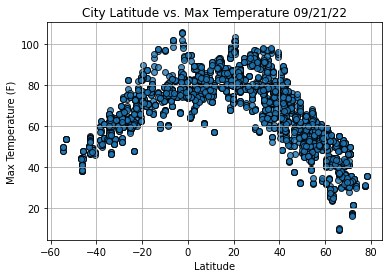

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")



In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

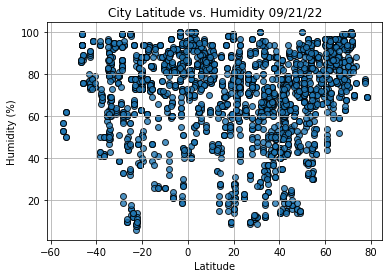

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

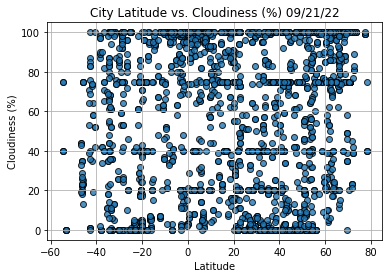

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.

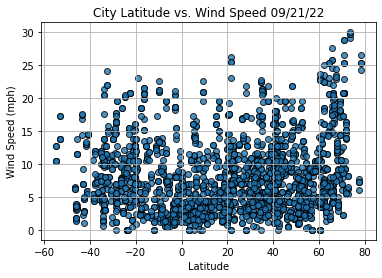

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")


In [61]:
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-09-21 17:12:49,72.7868,-56.1549,34.02,70,81,8.14
1,Avarua,CK,2022-09-21 17:12:50,-21.2078,-159.7750,73.45,78,75,11.50
2,Abrau-Dyurso,RU,2022-09-21 17:12:50,44.6900,37.5900,53.06,63,95,10.40
3,Port Hardy,CA,2022-09-21 17:12:51,50.6996,-127.4199,53.78,76,20,2.30
4,Kaitangata,NZ,2022-09-21 17:09:41,-46.2817,169.8464,40.84,94,22,3.62
5,Tiksi,RU,2022-09-21 17:12:51,71.6872,128.8694,33.22,99,100,16.37
6,Ushuaia,AR,2022-09-21 17:11:17,-54.8000,-68.3000,47.86,57,75,12.66
7,Arraial Do Cabo,BR,2022-09-21 17:12:52,-22.9661,-42.0278,73.26,78,0,11.50
8,Bluff,NZ,2022-09-21 17:12:52,-46.6000,168.3333,44.60,86,44,6.35
9,Hualmay,PE,2022-09-21 17:12:53,-11.0964,-77.6139,66.16,71,61,12.77


In [60]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2022-09-21 17:12:54
Lat                      -34.5322
Lng                       20.0403
Max Temp                    56.34
Humidity                       81
Cloudiness                     44
Wind Speed                   5.03
Name: 13, dtype: object

In [62]:
city_data_df["Lat"] >= 0

0        True
1       False
2        True
3        True
4       False
        ...  
2286     True
2287     True
2288     True
2289     True
2290     True
Name: Lat, Length: 2291, dtype: bool

In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-09-21 17:12:49,72.7868,-56.1549,34.02,70,81,8.14
2,Abrau-Dyurso,RU,2022-09-21 17:12:50,44.6900,37.5900,53.06,63,95,10.40
3,Port Hardy,CA,2022-09-21 17:12:51,50.6996,-127.4199,53.78,76,20,2.30
5,Tiksi,RU,2022-09-21 17:12:51,71.6872,128.8694,33.22,99,100,16.37
10,Adrar,MR,2022-09-21 17:12:53,20.5022,-10.0711,99.55,24,28,17.43
...,...,...,...,...,...,...,...,...,...
2286,Qaanaaq,GL,2022-09-21 18:45:40,77.4840,-69.3632,31.14,76,100,6.08
2287,Klaksvik,FO,2022-09-21 18:45:41,62.2266,-6.5890,52.72,96,100,24.92
2288,Polyarnyy,RU,2022-09-21 18:45:41,69.1989,33.4478,42.49,72,99,18.23
2289,Tessalit,ML,2022-09-21 18:45:42,20.1986,1.0114,96.15,20,64,11.10


In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-09-21 17:12:49,72.7868,-56.1549,34.02,70,81,8.14
2,Abrau-Dyurso,RU,2022-09-21 17:12:50,44.6900,37.5900,53.06,63,95,10.40
3,Port Hardy,CA,2022-09-21 17:12:51,50.6996,-127.4199,53.78,76,20,2.30
5,Tiksi,RU,2022-09-21 17:12:51,71.6872,128.8694,33.22,99,100,16.37
10,Adrar,MR,2022-09-21 17:12:53,20.5022,-10.0711,99.55,24,28,17.43


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

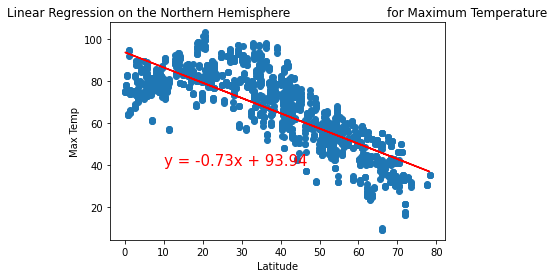

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

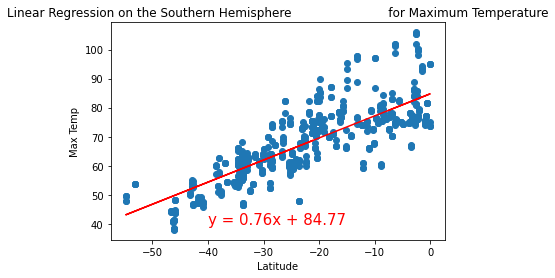

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,40))

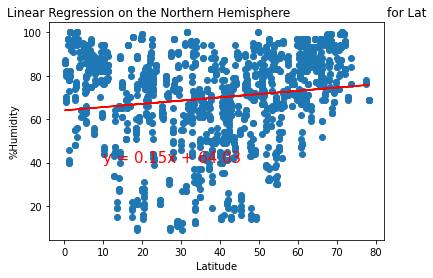

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Lat', '%Humidity',(10,40))

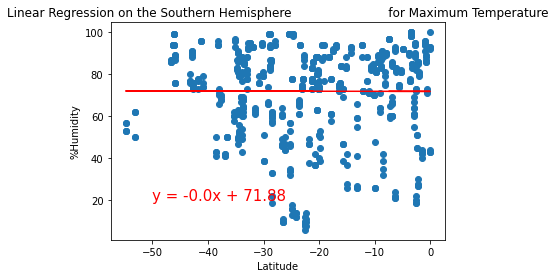

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', '%Humidity',(-50,20))

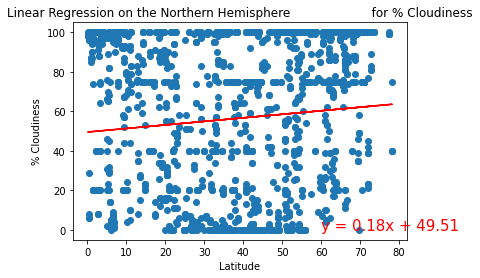

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(60,0))

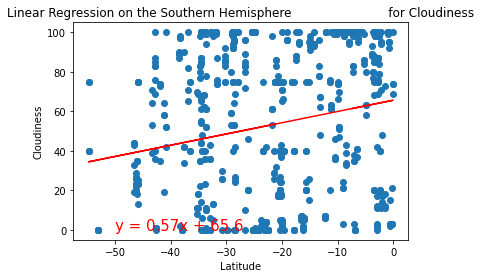

In [109]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,0))

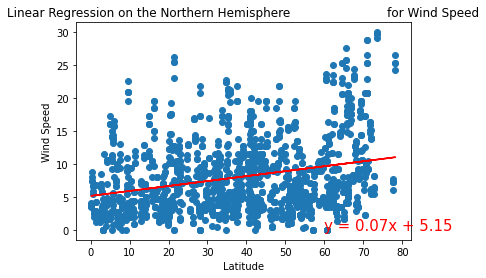

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(60,0))

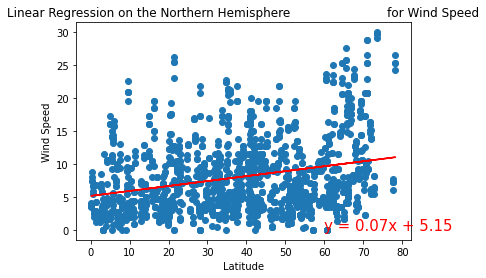

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(60,0))

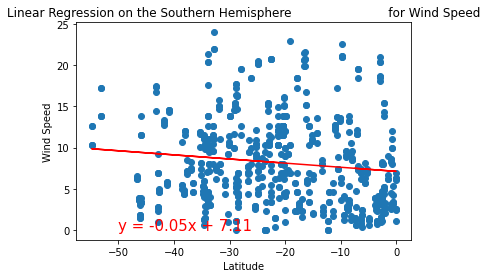

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,0))